<a href="https://colab.research.google.com/github/OceanDECRUZ/IPSA_Project/blob/main/Project_DECRUZ_HA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : DE CRUZ Océan / HA Maxime                                                
Class : SAA
1.   LSTM Model
2.   GRU Model



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys #global location
location="/content/gdrive/My Drive/0IPSA/Ma512/TP/Projet/" #
sys.path.append(location) # The location of the .ipynb file.

%cd /content/gdrive/My Drive/0IPSA/Ma512/TP/Projet

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/My Drive/0IPSA/Ma512/TP/Projet


We import the different libraiaires that we are going to use for the next part 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import load_model, Model
from keras.layers import Dense, Activation, Input, LSTM, Reshape
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

We import the value from the excel place in the drive

We remove the first column who is index


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/0IPSA/Ma512/TP/Projet/Turbine_Data_project.csv')

columns = data.columns
data = data.drop(columns=[columns[0]])
print(data.shape)

data=np.array(data)

(118224, 3)


We are going to manage the data for the model


In [ ]:
data = np.array(data)

x = data[:,0:2]
y = data[:,2].reshape(-1,1)

N= x.shape[0]   
n= int(0.7 * x.shape[0])  
n_1 = int(0.15 * x.shape[0])

x_train, x_test, x_val = x[:n,:], x[N-n_1:,:], x[n:n_1+n,:]
y_train, y_test, y_val = y[:n,:], y[N-n_1:,:], y[n:n_1+n,:]

xtrain = x_train.reshape(-1,1,2)
ytrain = y_train.reshape(-1,1,1)
xval = x_val.reshape(-1,1,2)
yval = y_val.reshape(-1,1,1)
xtest = x_test.reshape(-1,1,2)
ytest = y_test.reshape(-1,1,1)

print("size of xtrain " , xtrain.shape)
print("size of ytrain " , ytrain.shape)
print("size of xval " , xval.shape)
print("size of yval " , yval.shape)
print("size of xtest " , xtest.shape)
print("size of ytest " , ytest.shape)


size of xtrain  (82756, 1, 2)
size of ytrain  (82756, 1, 1)
size of xval  (17733, 1, 2)
size of yval  (17733, 1, 1)
size of xtest  (17733, 1, 2)
size of ytest  (17733, 1, 1)


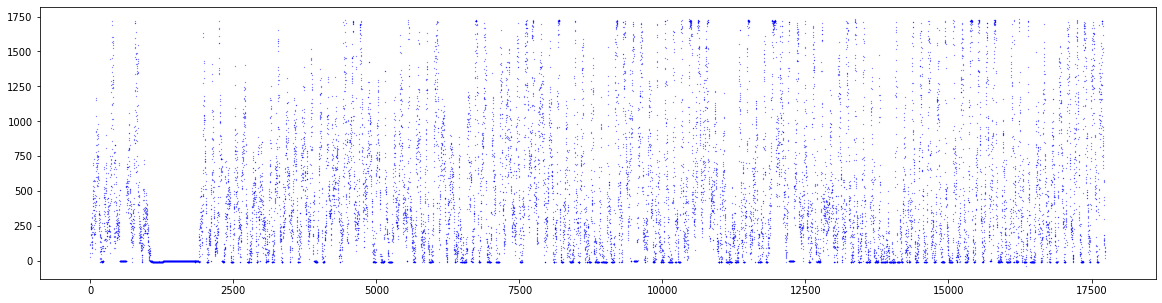

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(np.arange(1,ytest.shape[0]+1),y_test,'bo',markersize=0.2)

In [ ]:

sequence_length = 1
n_values = 2

modellstm = tf.keras.Sequential()

modellstm.add(tf.keras.layers.LSTM(units=128, input_shape=(1, 2)))
modellstm.add(tf.keras.layers.Dense(units=64, activation='relu'))
modellstm.add(tf.keras.layers.Dense(units=2, activation='relu'))

modellstm.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               67072     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 75,458
Trainable params: 75,458
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modellstm.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

We train the model

In [ ]:
histlstm= modellstm.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=10)

Epoch 1/10
2587/2587 [==============================] - 18s 6ms/step - loss: 86952.5547 - root_mean_squared_error: 294.8772 - val_loss: 31535.4590 - val_root_mean_squared_error: 177.5823
Epoch 2/10
2587/2587 [==============================] - 14s 5ms/step - loss: 22106.7188 - root_mean_squared_error: 148.6833 - val_loss: 27953.5332 - val_root_mean_squared_error: 167.1931
Epoch 3/10
2587/2587 [==============================] - 15s 6ms/step - loss: 20367.7969 - root_mean_squared_error: 142.7158 - val_loss: 17355.9434 - val_root_mean_squared_error: 131.7420
Epoch 4/10
2587/2587 [==============================] - 15s 6ms/step - loss: 18425.0312 - root_mean_squared_error: 135.7388 - val_loss: 15811.0352 - val_root_mean_squared_error: 125.7419
Epoch 5/10
2587/2587 [==============================] - 14s 6ms/step - loss: 17311.4082 - root_mean_squared_error: 131.5728 - val_loss: 14832.0508 - val_root_mean_squared_error: 121.7869
Epoch 6/10
2587/2587 [==============================] - 14s 6ms/s

We plot the different variables

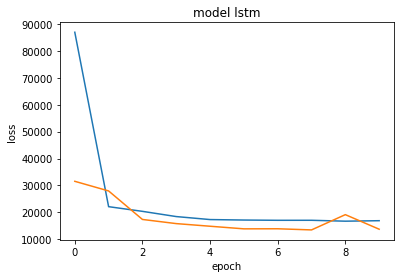

In [ ]:
plt.plot(histlstm.epoch, histlstm.history['loss'])
plt.plot(histlstm.epoch, histlstm.history['val_loss'])
plt.title('model lstm')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

We predict the value of xtest

In [ ]:
ypredlstm = modellstm.predict(xtest)

555/555 [==============================] - 2s 2ms/step


In [ ]:
ypred_score_lstm =ypredlstm[:,1].reshape(ypredlstm.shape[0],1)

Determine the accuracy of the prediction using r2_score function ( we compare ytest and y prediction 

In [ ]:
score=r2_score(y_test,ypred_score_lstm)
print("Accuracy = ", score*100, "%")

Accuracy =  96.1731994633691 %


We can also use this model

In [ ]:
modelgru = tf.keras.Sequential()

modelgru.add(tf.keras.layers.GRU(units=128, input_shape=(1, 2)))
modelgru.add(tf.keras.layers.Dense(units=64, activation='relu'))
modelgru.add(tf.keras.layers.Dense(units=2, activation='relu'))

modelgru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               50688     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 59,074
Trainable params: 59,074
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelgru.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
histgru= modelgru.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=10)

Epoch 1/10
2587/2587 [==============================] - 16s 5ms/step - loss: 83233.0625 - root_mean_squared_error: 288.5014 - val_loss: 34158.4492 - val_root_mean_squared_error: 184.8201
Epoch 2/10
2587/2587 [==============================] - 13s 5ms/step - loss: 20382.0918 - root_mean_squared_error: 142.7659 - val_loss: 17898.9688 - val_root_mean_squared_error: 133.7870
Epoch 3/10
2587/2587 [==============================] - 13s 5ms/step - loss: 18369.7949 - root_mean_squared_error: 135.5352 - val_loss: 18014.4922 - val_root_mean_squared_error: 134.2181
Epoch 4/10
2587/2587 [==============================] - 14s 5ms/step - loss: 17690.6758 - root_mean_squared_error: 133.0063 - val_loss: 14932.7178 - val_root_mean_squared_error: 122.1995
Epoch 5/10
2587/2587 [==============================] - 13s 5ms/step - loss: 17332.3301 - root_mean_squared_error: 131.6523 - val_loss: 14722.5908 - val_root_mean_squared_error: 121.3367
Epoch 6/10
2587/2587 [==============================] - 14s 5ms/s

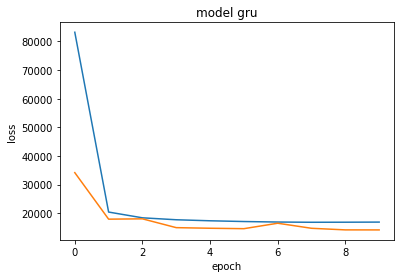

In [32]:
plt.plot(histgru.epoch, histgru.history['loss'])
plt.plot(histgru.epoch, histgru.history['val_loss'])
plt.title('model gru')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [33]:
ypredgru = modellstm.predict(xtest)

555/555 [==============================] - 1s 2ms/step


In [34]:
ypred_score_gru =ypredgru[:,1].reshape(ypredgru.shape[0],1)

In [35]:
score=r2_score(y_test,ypred_score_gru)
print("Accuracy = ", score*100, "%")

Accuracy =  96.1731994633691 %
